In [113]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from itertools import combinations

from sklearn.neighbors import radius_neighbors_graph
import networkx as nx

In [114]:
X = np.array([
    [200, 800], # 1
    [350, 400], # 2
    [600, 200], # 3
    [1000, 150], #4
    [1400, 375], #5
    [1300, 700], #6
    [1125, 1075], #7
    [600, 975], #8
    [675, 750], #9
    [1100, 625], #10
    [950, 1175], #11
])
X = X + np.random.normal(0, 0.05, X.shape)
E = list(combinations(range(len(X)), 2))

In [115]:
A = radius_neighbors_graph(X, 500, mode='distance', include_self=False).toarray() #.astype(int)
G = nx.from_numpy_array(A)

#### Blob

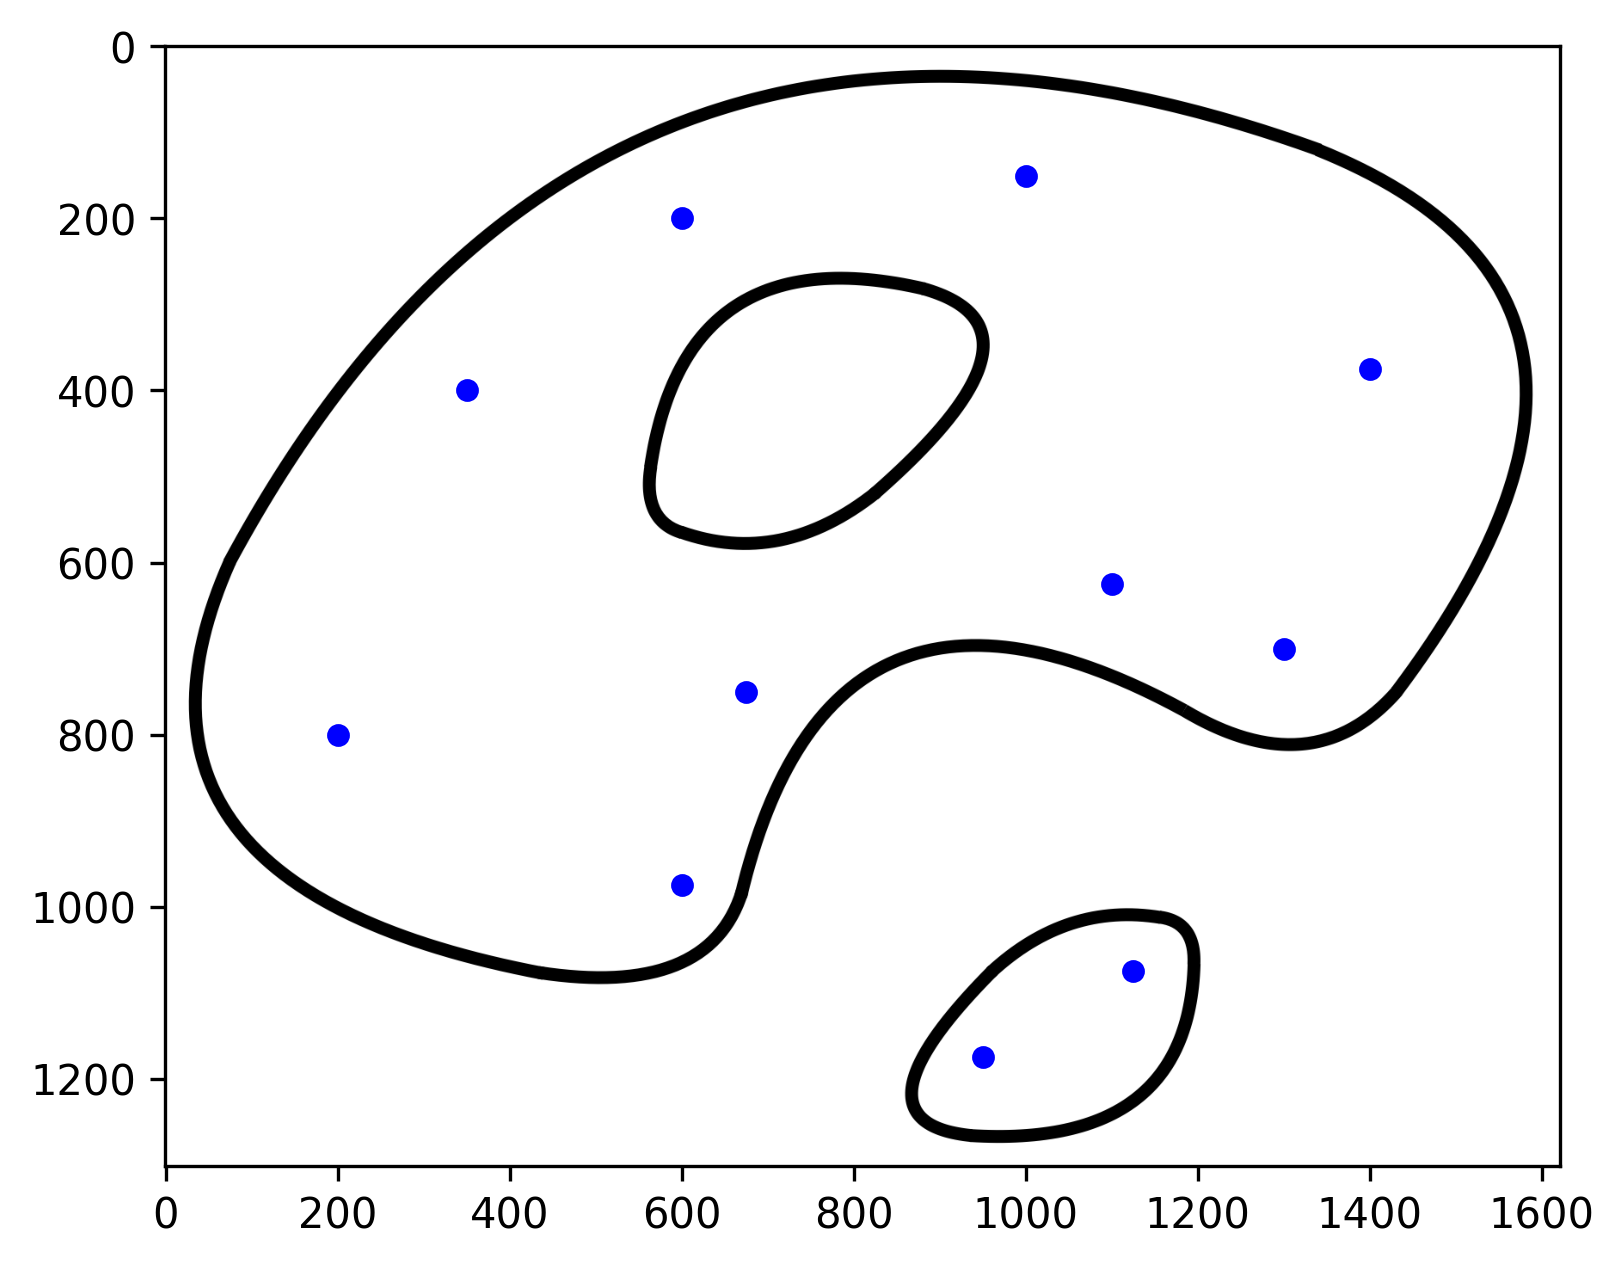

In [116]:
fig, ax = plt.subplots(figsize=(6,6), dpi=300)
ax.imshow(plt.imread("blob.png"))
plt.scatter(X[:,0], X[:,1], s=20, c="b")
plt.show()

#### Random

In [117]:
vertex_idx = np.random.choice(range(len(X)), 5, replace=None)

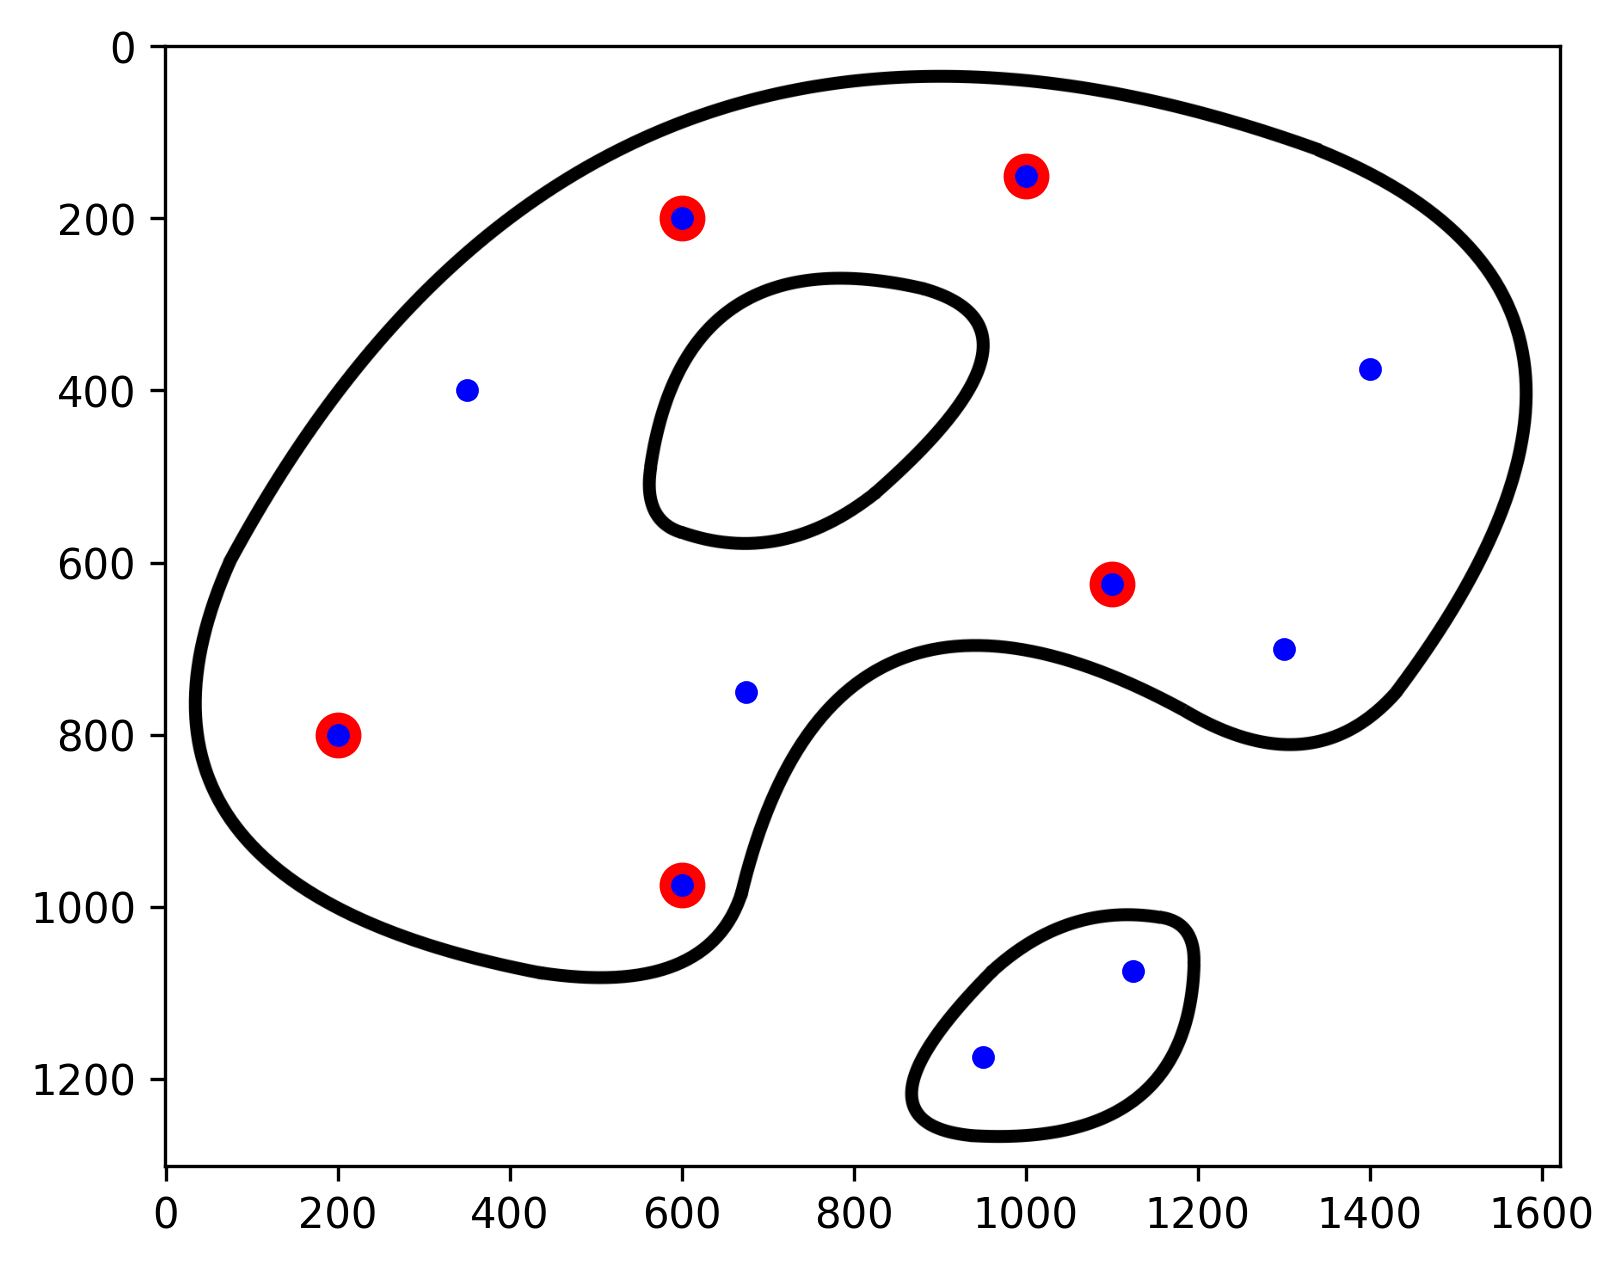

In [118]:
fig, ax = plt.subplots(figsize=(6,6), dpi=300)
ax.imshow(plt.imread("blob.png"))

for i in vertex_idx:
    plt.scatter(X[i,0], X[i,1], s=100, c="r")

plt.scatter(X[:,0], X[:,1], s=20, c="b")
plt.show()

#### Mixup

In [120]:
edge_idx = np.random.choice(range(len(E)), 5, replace=None)
edge_idx

alphas_edge = np.random.dirichlet(np.ones(2)*3, size=5)
alphas_edge

array([[0.40736369, 0.59263631],
       [0.34746541, 0.65253459],
       [0.07595739, 0.92404261],
       [0.6320435 , 0.3679565 ],
       [0.72956415, 0.27043585]])

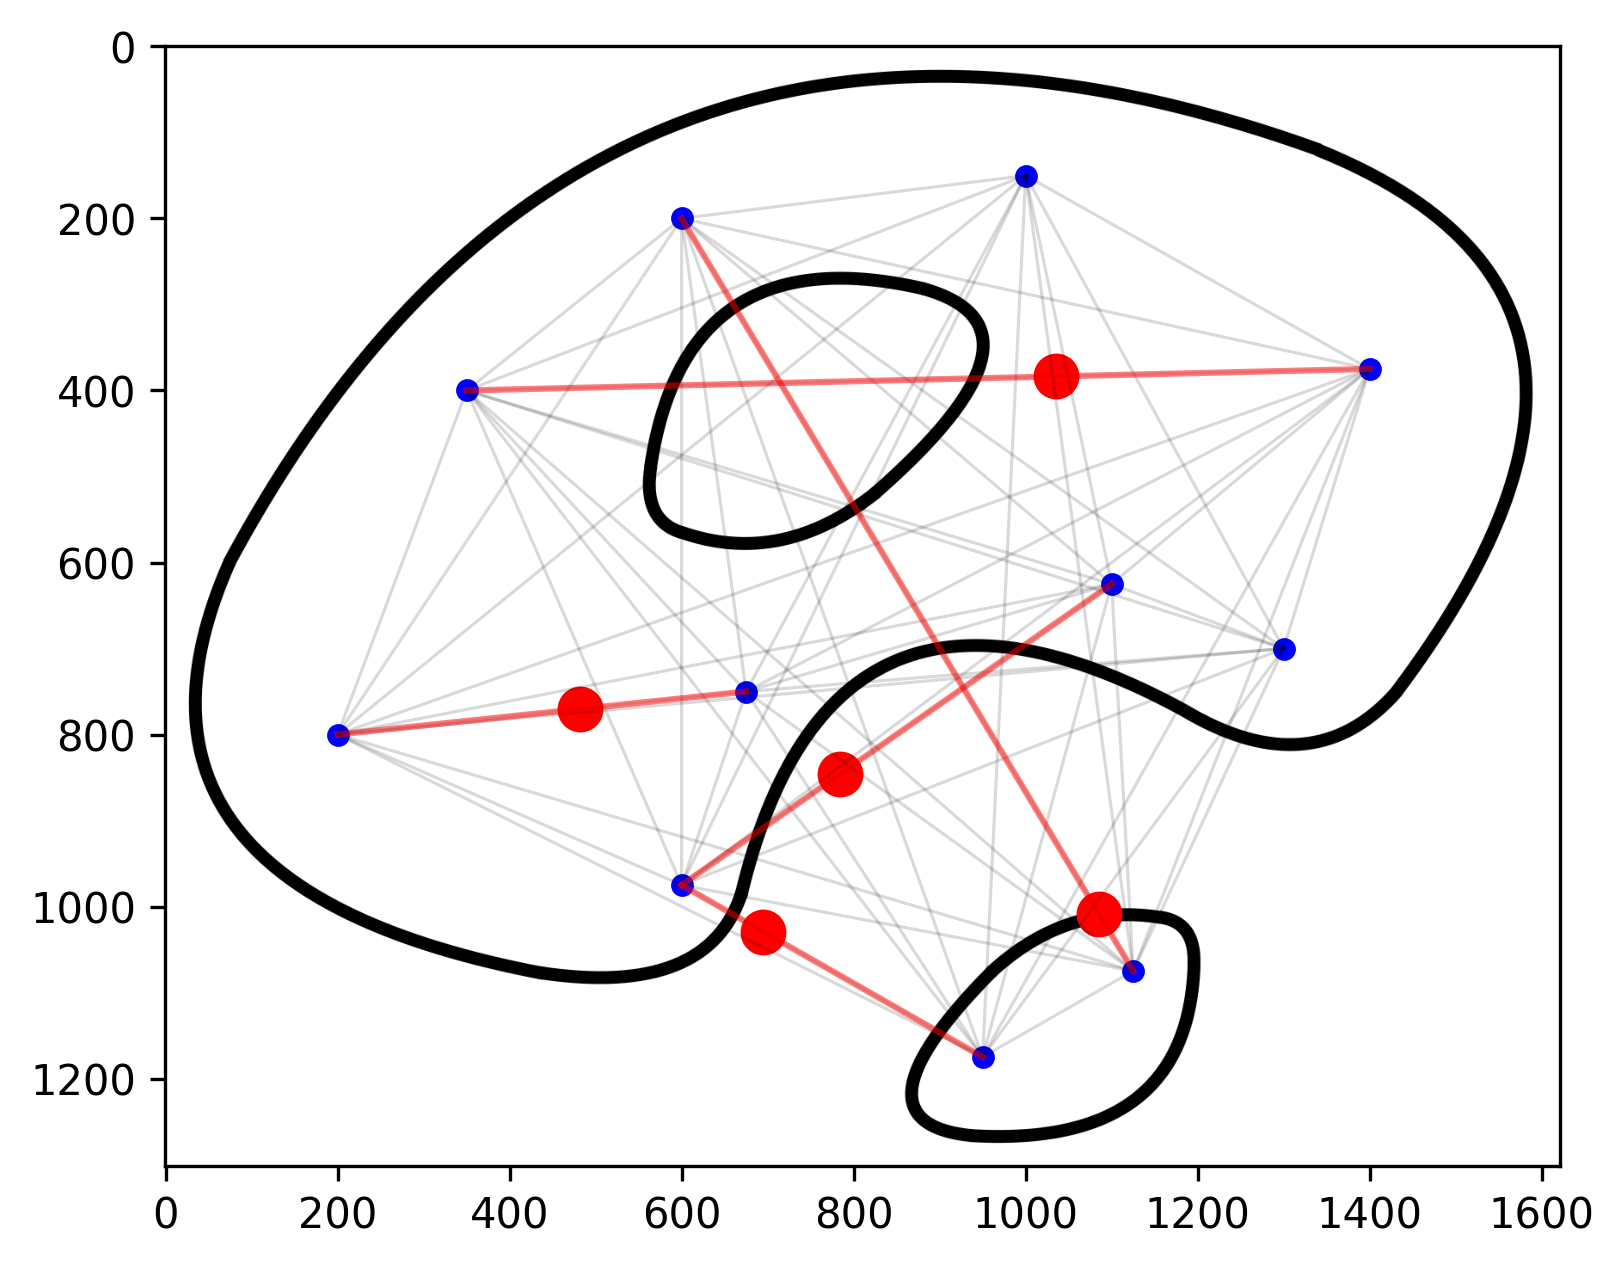

In [121]:
fig, ax = plt.subplots(figsize=(6,6), dpi=300)
ax.imshow(plt.imread("blob.png"))

for e in E:
    (start_id, end_id) = e
    plt.plot([X[start_id,0], X[end_id,0]], [X[start_id,1], X[end_id,1]], 'k-', alpha=0.15, linewidth=0.75)
    
for i, e in enumerate([x for i, x in enumerate(E) if i in edge_idx]):
    (start_id, end_id) = e
    plt.plot([X[start_id,0], X[end_id,0]], [X[start_id,1], X[end_id,1]], 'r-', alpha=0.5)

    p = np.array([[X[start_id,0], X[end_id,0]], [X[start_id,1], X[end_id,1]]]) @ alphas_edge[i]
    plt.scatter(p[0], p[1], s=100, c="r")
    
plt.scatter(X[:,0], X[:,1], s=20, c="b")

plt.show()

#### SMOTE

In [163]:
edge_idx = np.random.choice(range(len(G.edges())), 5, replace=None)

alphas_edge = np.random.dirichlet(np.ones(2)*3, size=5)
alphas_edge

array([[0.25489409, 0.74510591],
       [0.50258087, 0.49741913],
       [0.56656074, 0.43343926],
       [0.74447867, 0.25552133],
       [0.59487418, 0.40512582]])

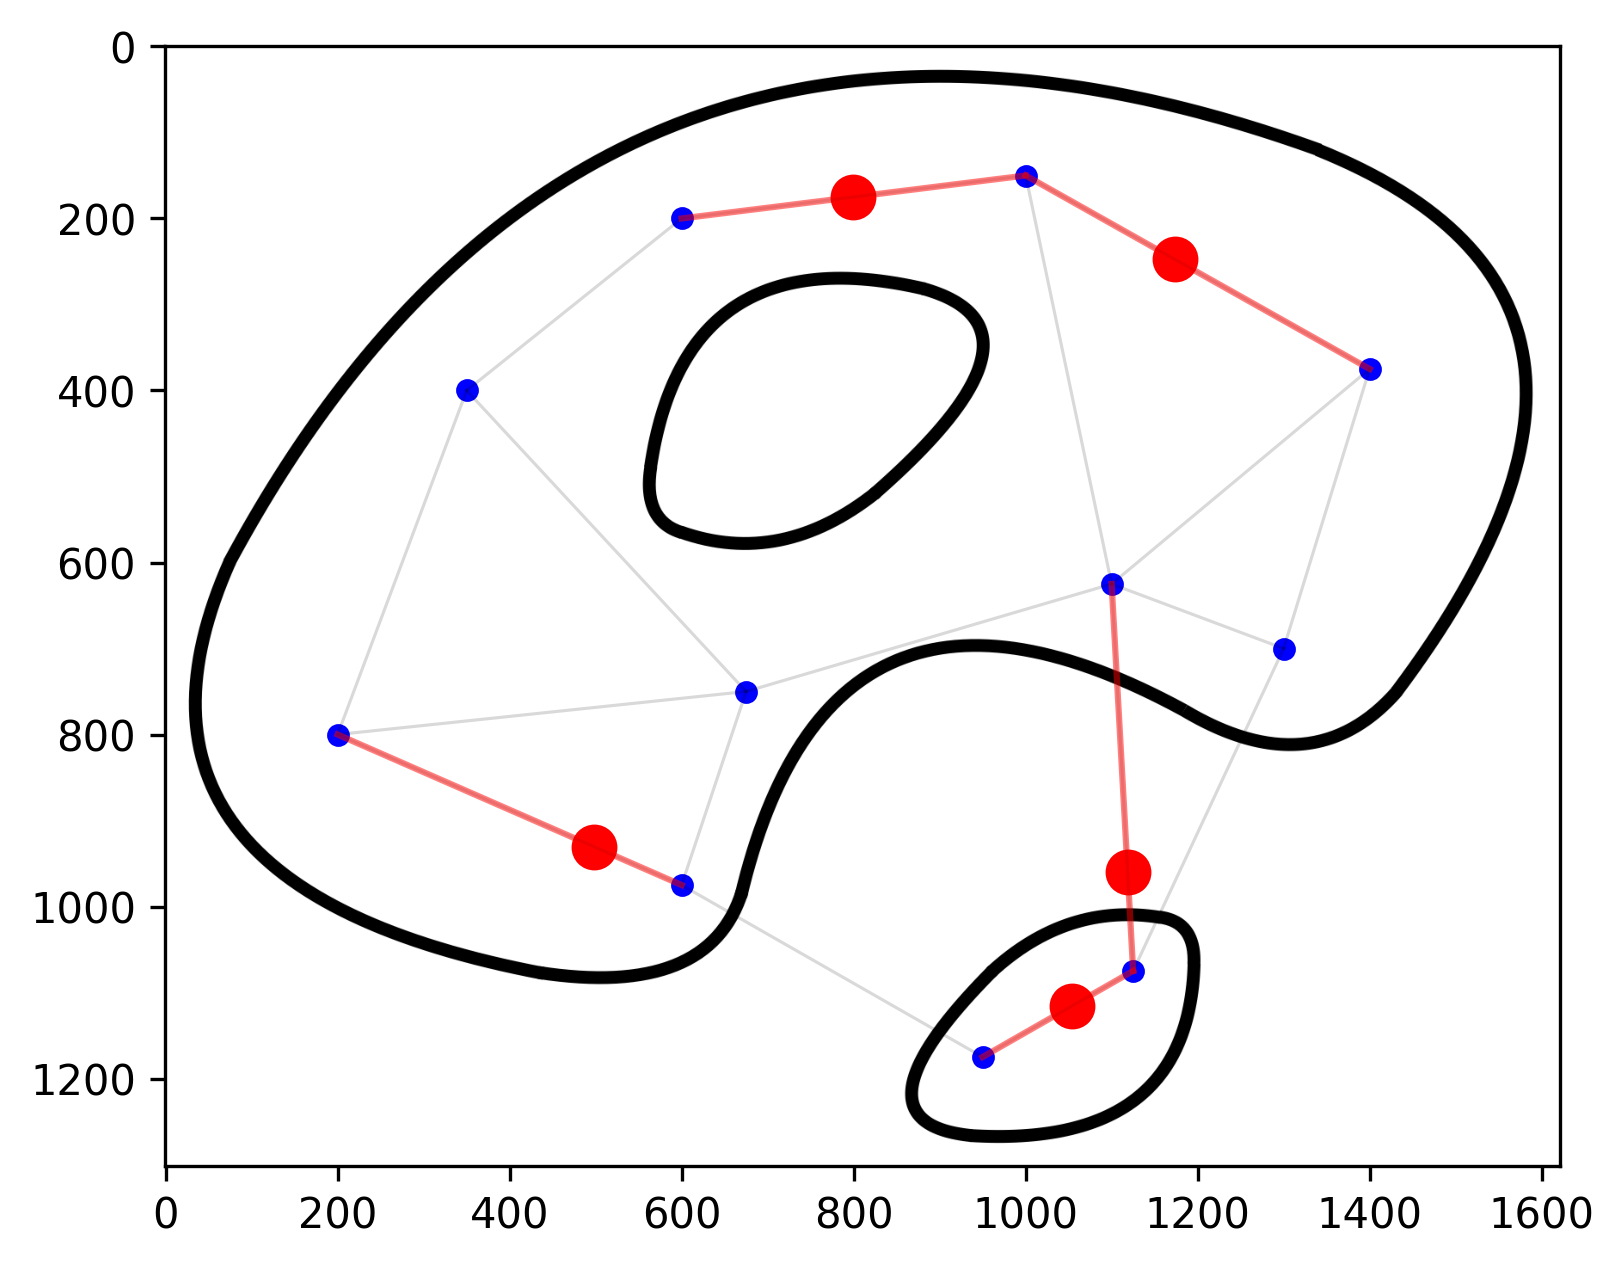

In [164]:
fig, ax = plt.subplots(figsize=(6,6), dpi=300)
ax.imshow(plt.imread("blob.png"))

for e in G.edges():
    (start_id, end_id) = e
    plt.plot([X[start_id,0], X[end_id,0]], [X[start_id,1], X[end_id,1]], 'k-', alpha=0.15, linewidth=0.75)
    
for i, e in enumerate([x for i, x in enumerate(G.edges()) if i in edge_idx]):
    (start_id, end_id) = e
    plt.plot([X[start_id,0], X[end_id,0]], [X[start_id,1], X[end_id,1]], 'r-', alpha=0.5)

    p = np.array([[X[start_id,0], X[end_id,0]], [X[start_id,1], X[end_id,1]]]) @ alphas_edge[i]
    plt.scatter(p[0], p[1], s=100, c="r")
    
plt.scatter(X[:,0], X[:,1], s=20, c="b")

plt.show()

#### Simplicial SMOTE

In [ ]:
K = set()
for clique in nx.find_cliques(G):
    triangles = combinations(clique, 3)
    for triangle in triangles:
        K.add(triangle)
        
K = list(K)
        
edge_idx = np.random.choice(range(len(G.edges())), 1, replace=None)

In [180]:
triangle_idx = np.random.choice(range(len(K)), 4, replace=None)
triangle_idx

array([3, 2, 4, 1])

In [184]:
triangle_idx = np.array([0, 1, 2, 4])

In [166]:
def stack(idx):
    ret = np.empty((0, 2))
    for _id in idx:
        ret = np.vstack((ret, X[_id,:]))
    return ret

In [176]:
alphas_triangles = np.random.dirichlet(np.ones(3)*4, size=5)
alphas_triangles

array([[0.38034344, 0.39930244, 0.22035413],
       [0.26294435, 0.43392921, 0.30312644],
       [0.13165032, 0.33062194, 0.53772774],
       [0.32600365, 0.19097936, 0.483017  ],
       [0.26077265, 0.35478667, 0.38444068]])

In [168]:
alphas_edges = np.random.dirichlet(np.ones(2)*3, size=1)
alphas_edges

array([[0.33980092, 0.66019908]])

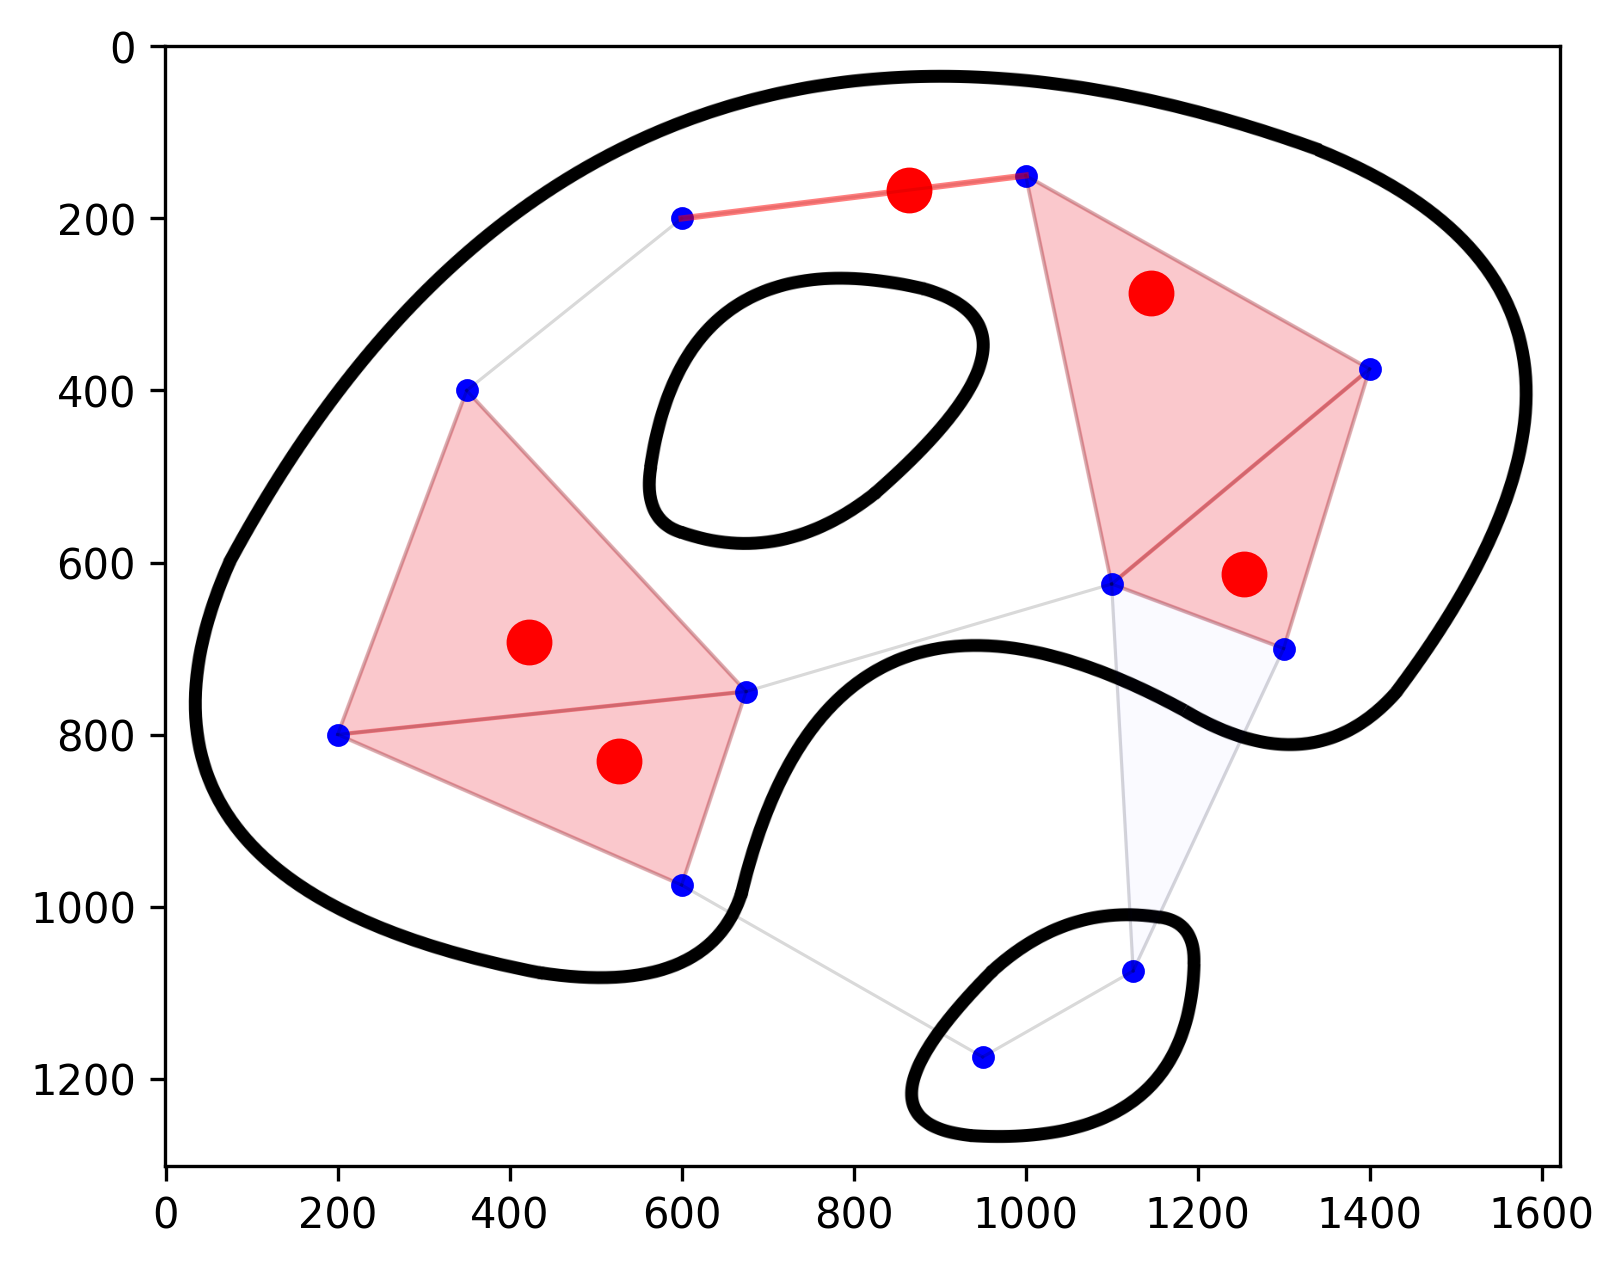

In [185]:
fig, ax = plt.subplots(figsize=(6,6), dpi=300)
ax.imshow(plt.imread("blob.png"))

for e in G.edges():
    (start_id, end_id) = e
    plt.plot([X[start_id,0], X[end_id,0]], [X[start_id,1], X[end_id,1]], 'k-', alpha=0.15, linewidth=0.75)
    
for i, e in enumerate([x for i, x in enumerate(G.edges()) if i in edge_idx]):
    (start_id, end_id) = e
    plt.plot([X[start_id,0], X[end_id,0]], [X[start_id,1], X[end_id,1]], 'r-', alpha=0.5)

    p = np.array([[X[start_id,0], X[end_id,0]], [X[start_id,1], X[end_id,1]]]) @ alphas_edges[i]
    plt.scatter(p[0], p[1], s=100, c="r")
    
for i, triangle in enumerate(K):
    t = plt.Polygon(stack(triangle), color="b", alpha=0.02)
    plt.gca().add_patch(t)
    
for i, tr in enumerate([x for i, x in enumerate(K) if i in triangle_idx]):
    t = plt.Polygon(stack(tr), color="r", alpha=0.2)
    plt.gca().add_patch(t)
    p = np.array(X[np.array(tr)]).T @ alphas_triangles[i]
    plt.scatter(p[0], p[1], s=100, c="r")
    
plt.scatter(X[:,0], X[:,1], s=20, c="b")

plt.show()